<a href="https://colab.research.google.com/github/akashroy20/python-ineuron/blob/master/xgboost_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!nvidia-smi

Fri Apr 16 18:08:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                       skiprows = 1, header = None)

In [9]:
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", 
                       skiprows = 1, header = None)

In [10]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
              'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [11]:
train_set.shape

(32560, 15)

In [12]:
test_set.shape

(16281, 15)

In [13]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [14]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [15]:
df = train_set.append(test_set, sort=False)
df.shape

(48841, 15)

In [16]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [17]:
df['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [18]:
a = df.columns
for i in a:
  print(df[i].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ... 173449  89686 350977]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 

In [19]:
df1 = train_set['wage_class']
df1 = pd.DataFrame(df1)
df1 = pd.get_dummies(df1, drop_first=True)
df1

,wage_class_ >50K
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [20]:
df2 = test_set['wage_class']
df2 = pd.DataFrame(df2)
df2 = pd.get_dummies(df2, drop_first=True)
df2

,wage_class_ >50K.
0,0
1,0
2,1
3,1
4,0
...,...
16276,0
16277,0
16278,0
16279,0


In [21]:
df2 = test_set['wage_class']
df2 = pd.DataFrame(df2)
df2['wage_class_ >50K'] = pd.get_dummies(df2,drop_first=True)
df2 = pd.DataFrame(df2['wage_class_ >50K'])
df2 

,wage_class_ >50K
0,0
1,0
2,1
3,1
4,0
...,...
16276,0
16277,0
16278,0
16279,0


In [22]:
wage_class = df1.append(df2, sort=False)
wage_class

,wage_class_ >50K
0,0
1,0
2,0
3,0
4,0
...,...
16276,0
16277,0
16278,0
16279,0


In [23]:
df['wage_class'] = wage_class
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [24]:
df[df["occupation"] == ' ?'].shape[0]

2809

In [25]:
df.drop(df[df["occupation"] == ' ?'].index, inplace = True)

In [26]:
df[df["occupation"] == ' ?'].shape[0]

0

In [27]:
occupation_map = df['occupation'].value_counts().to_dict()
occupation_map

{' Adm-clerical': 5400,
 ' Armed-Forces': 15,
 ' Craft-repair': 5883,
 ' Exec-managerial': 5853,
 ' Farming-fishing': 1428,
 ' Handlers-cleaners': 2006,
 ' Machine-op-inspct': 2891,
 ' Other-service': 4740,
 ' Priv-house-serv': 237,
 ' Prof-specialty': 5923,
 ' Protective-serv': 944,
 ' Sales': 5289,
 ' Tech-support': 1392,
 ' Transport-moving': 2264}

In [28]:
df['occupation'] = df['occupation'].map(occupation_map)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,5853,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,2006,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,2006,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,5923,Wife,Black,Female,0,0,40,Cuba,0
5,49,Private,160187,9th,5,Married-spouse-absent,4740,Not-in-family,Black,Female,0,0,16,Jamaica,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,5923,Own-child,White,Male,0,0,40,United-States,0
16276,39,Private,215419,Bachelors,13,Divorced,5923,Not-in-family,White,Female,0,0,36,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,5923,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,5400,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [29]:
df[df["workclass"] == ' ?'].shape[0]

0

In [30]:
workclass_map = df['workclass'].value_counts().to_dict()
workclass_map

{' Federal-gov': 1381,
 ' Local-gov': 3007,
 ' Private': 32601,
 ' Self-emp-inc': 1639,
 ' Self-emp-not-inc': 3714,
 ' State-gov': 1902,
 ' Without-pay': 21}

In [31]:
df['workclass'] = df['workclass'].map(workclass_map)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,3714,83311,Bachelors,13,Married-civ-spouse,5853,Husband,White,Male,0,0,13,United-States,0
1,38,32601,215646,HS-grad,9,Divorced,2006,Not-in-family,White,Male,0,0,40,United-States,0
2,53,32601,234721,11th,7,Married-civ-spouse,2006,Husband,Black,Male,0,0,40,United-States,0
3,28,32601,338409,Bachelors,13,Married-civ-spouse,5923,Wife,Black,Female,0,0,40,Cuba,0
5,49,32601,160187,9th,5,Married-spouse-absent,4740,Not-in-family,Black,Female,0,0,16,Jamaica,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,32601,245211,Bachelors,13,Never-married,5923,Own-child,White,Male,0,0,40,United-States,0
16276,39,32601,215419,Bachelors,13,Divorced,5923,Not-in-family,White,Female,0,0,36,United-States,0
16278,38,32601,374983,Bachelors,13,Married-civ-spouse,5923,Husband,White,Male,0,0,50,United-States,0
16279,44,32601,83891,Bachelors,13,Divorced,5400,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [32]:
df[df["native_country"] == ' ?'].shape[0]

773

In [33]:
df.drop(df[df["native_country"] == ' ?'].index, inplace = True)

In [34]:
df[df["native_country"] == ' ?'].shape[0]

0

In [35]:
native_country_map = df['native_country'].value_counts().to_dict()
native_country_map

{' Cambodia': 24,
 ' Canada': 151,
 ' China': 104,
 ' Columbia': 81,
 ' Cuba': 127,
 ' Dominican-Republic': 92,
 ' Ecuador': 41,
 ' El-Salvador': 142,
 ' England': 115,
 ' France': 35,
 ' Germany': 187,
 ' Greece': 46,
 ' Guatemala': 82,
 ' Haiti': 63,
 ' Holand-Netherlands': 1,
 ' Honduras': 18,
 ' Hong': 27,
 ' Hungary': 16,
 ' India': 144,
 ' Iran': 52,
 ' Ireland': 35,
 ' Italy': 97,
 ' Jamaica': 96,
 ' Japan': 83,
 ' Laos': 20,
 ' Mexico': 865,
 ' Nicaragua': 44,
 ' Outlying-US(Guam-USVI-etc)': 21,
 ' Peru': 43,
 ' Philippines': 266,
 ' Poland': 79,
 ' Portugal': 60,
 ' Puerto-Rico': 162,
 ' Scotland': 18,
 ' South': 94,
 ' Taiwan': 51,
 ' Thailand': 28,
 ' Trinadad&Tobago': 25,
 ' United-States': 39259,
 ' Vietnam': 80,
 ' Yugoslavia': 21}

In [36]:
df['native_country'] = df['native_country'].map(native_country_map)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,3714,83311,Bachelors,13,Married-civ-spouse,5853,Husband,White,Male,0,0,13,39259,0
1,38,32601,215646,HS-grad,9,Divorced,2006,Not-in-family,White,Male,0,0,40,39259,0
2,53,32601,234721,11th,7,Married-civ-spouse,2006,Husband,Black,Male,0,0,40,39259,0
3,28,32601,338409,Bachelors,13,Married-civ-spouse,5923,Wife,Black,Female,0,0,40,127,0
5,49,32601,160187,9th,5,Married-spouse-absent,4740,Not-in-family,Black,Female,0,0,16,96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,32601,245211,Bachelors,13,Never-married,5923,Own-child,White,Male,0,0,40,39259,0
16276,39,32601,215419,Bachelors,13,Divorced,5923,Not-in-family,White,Female,0,0,36,39259,0
16278,38,32601,374983,Bachelors,13,Married-civ-spouse,5923,Husband,White,Male,0,0,50,39259,0
16279,44,32601,83891,Bachelors,13,Divorced,5400,Own-child,Asian-Pac-Islander,Male,5455,0,40,39259,0


In [37]:
df.drop(['fnlwgt', 'education'], axis=1,inplace=True)
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,3714,13,Married-civ-spouse,5853,Husband,White,Male,0,0,13,39259,0
1,38,32601,9,Divorced,2006,Not-in-family,White,Male,0,0,40,39259,0
2,53,32601,7,Married-civ-spouse,2006,Husband,Black,Male,0,0,40,39259,0
3,28,32601,13,Married-civ-spouse,5923,Wife,Black,Female,0,0,40,127,0
5,49,32601,5,Married-spouse-absent,4740,Not-in-family,Black,Female,0,0,16,96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,32601,13,Never-married,5923,Own-child,White,Male,0,0,40,39259,0
16276,39,32601,13,Divorced,5923,Not-in-family,White,Female,0,0,36,39259,0
16278,38,32601,13,Married-civ-spouse,5923,Husband,White,Male,0,0,50,39259,0
16279,44,32601,13,Divorced,5400,Own-child,Asian-Pac-Islander,Male,5455,0,40,39259,0


In [38]:
df = pd.get_dummies(df, drop_first=True)
df

,age,workclass,education_num,occupation,capital_gain,capital_loss,hours_per_week,native_country,wage_class,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,50,3714,13,5853,0,0,13,39259,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,38,32601,9,2006,0,0,40,39259,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,53,32601,7,2006,0,0,40,39259,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,28,32601,13,5923,0,0,40,127,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5,49,32601,5,4740,0,0,16,96,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,32601,13,5923,0,0,40,39259,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
16276,39,32601,13,5923,0,0,36,39259,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
16278,38,32601,13,5923,0,0,50,39259,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16279,44,32601,13,5400,5455,0,40,39259,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


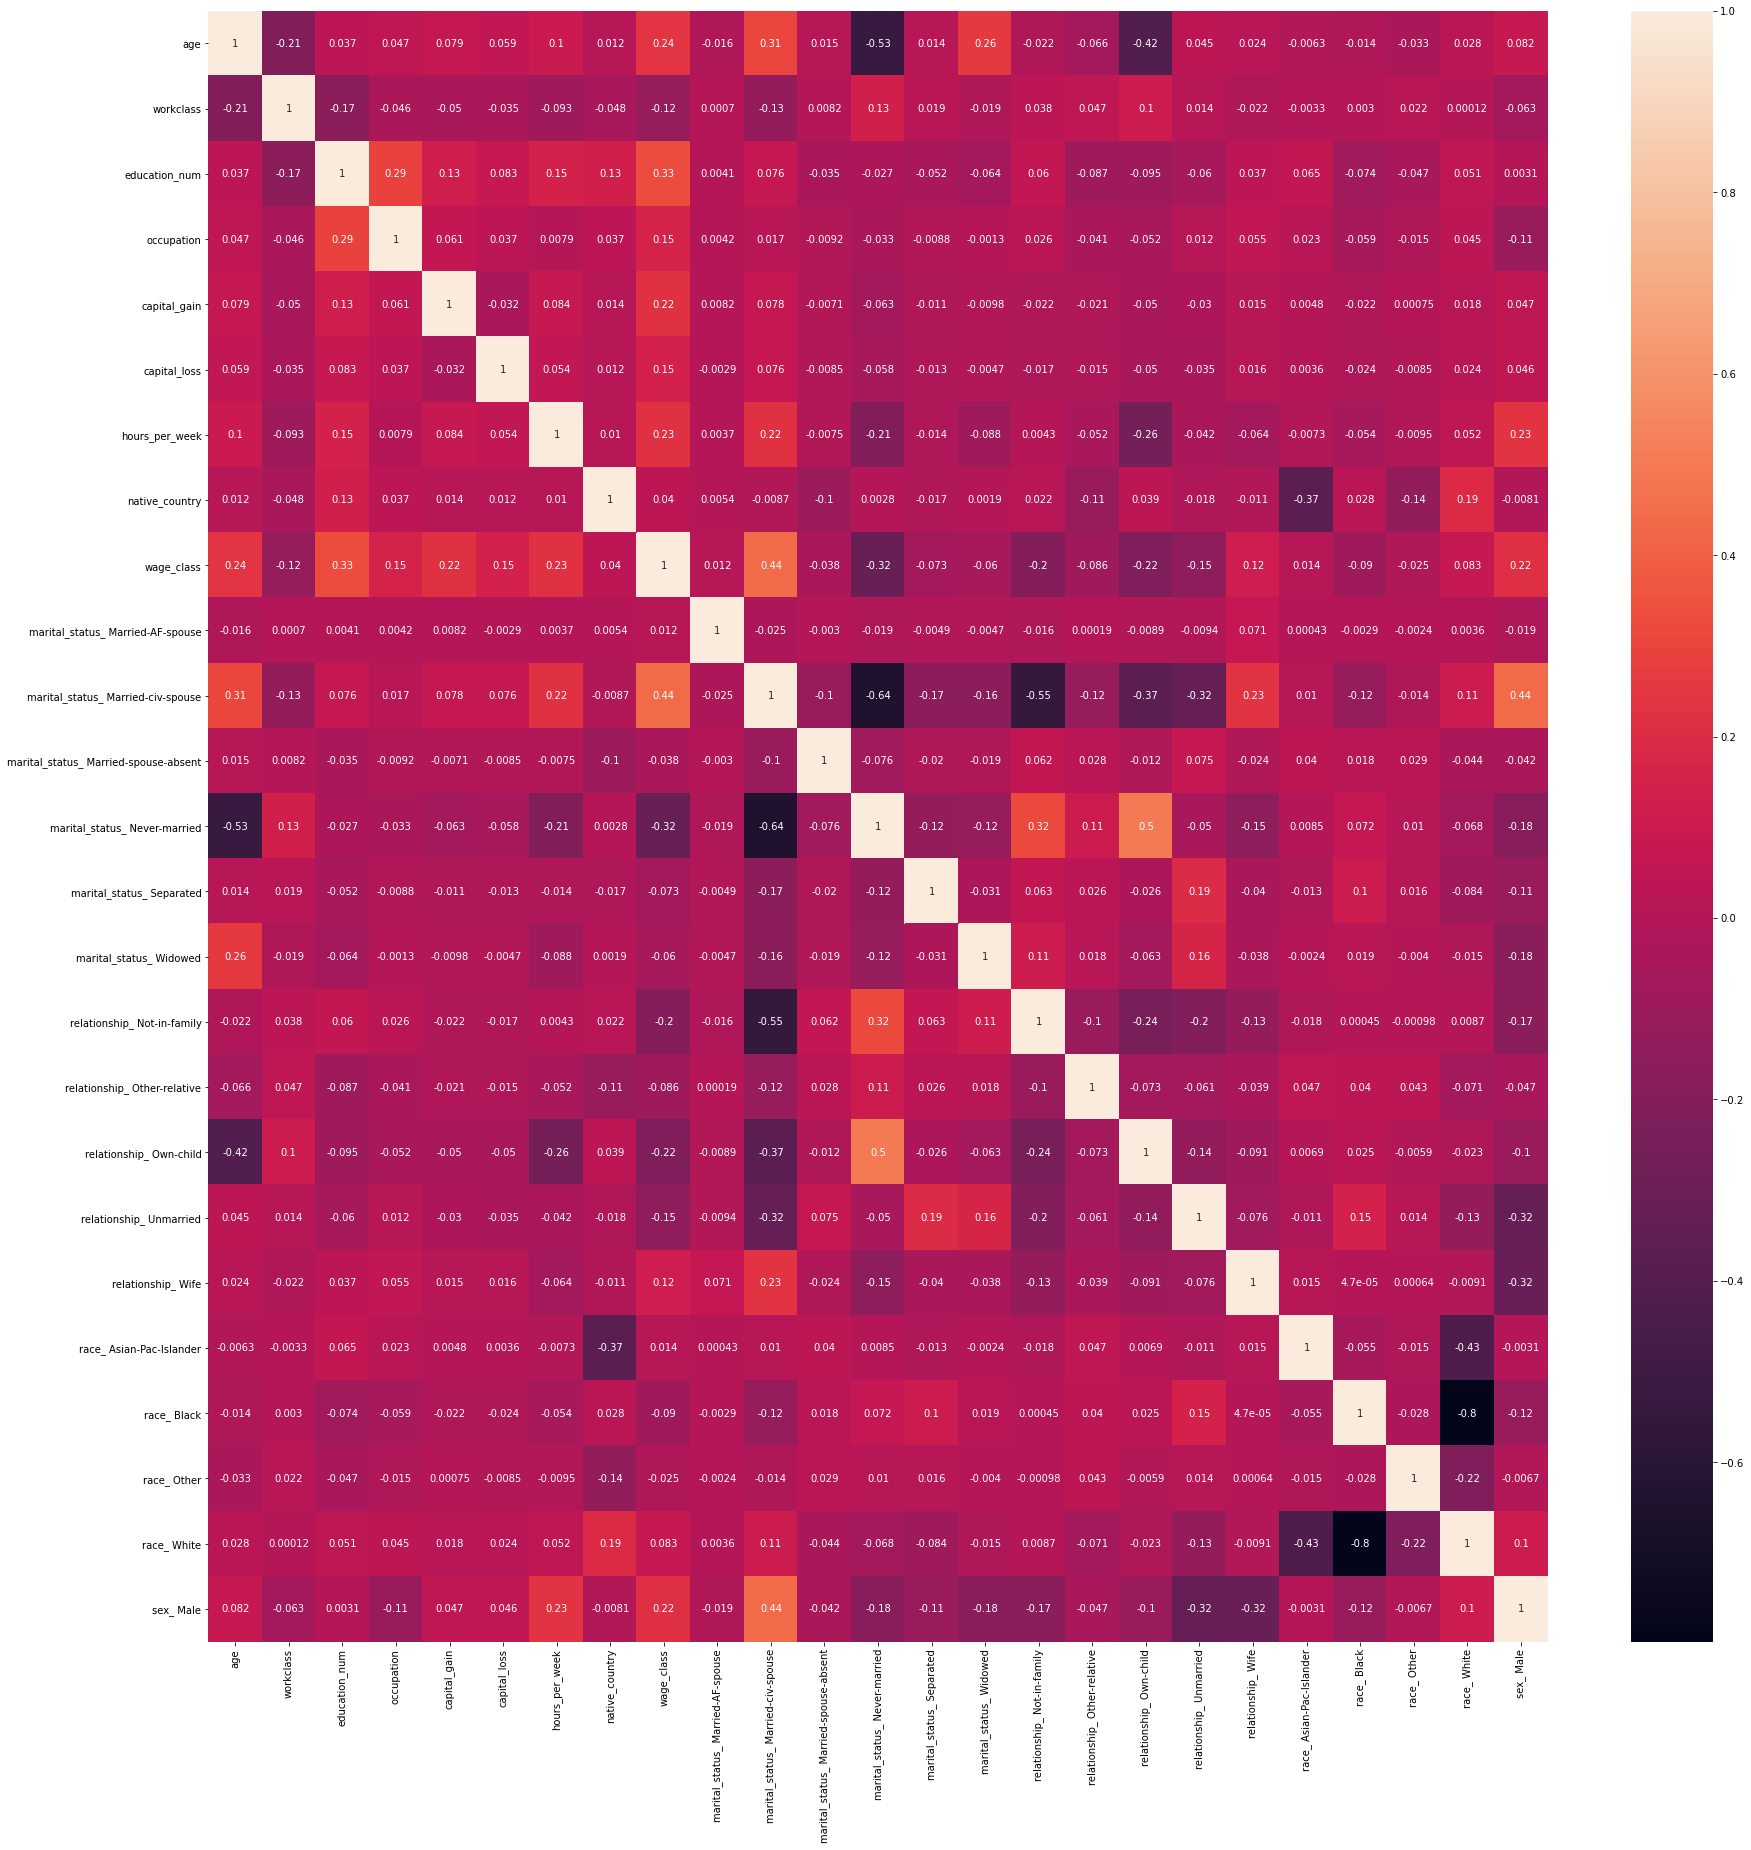

In [58]:
corr = df.corr()
top_features=corr.index
plt.figure(figsize=(30,30))
sns.heatmap(df[top_features].corr(), annot=True)

In [39]:
x=df.drop(labels='wage_class', axis=1)
y= df['wage_class']

In [40]:
x.head()

,age,workclass,education_num,occupation,capital_gain,capital_loss,hours_per_week,native_country,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,50,3714,13,5853,0,0,13,39259,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,38,32601,9,2006,0,0,40,39259,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,53,32601,7,2006,0,0,40,39259,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,28,32601,13,5923,0,0,40,127,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5,49,32601,5,4740,0,0,16,96,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [41]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: wage_class, dtype: uint8

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [45]:
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.8636363636363636

In [47]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8641755174819753

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [50]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [51]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.839, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.835, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.846, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.843, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.854, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.852, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.857, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.859, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.847, total=   0.7s
[CV]  l

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 27.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50,

In [52]:
# To  find the parameters giving maximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [55]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 200)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [56]:
# cheking training accuracy
y_pred = new_model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9214181286549707

In [57]:
y_pred = new_model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8558803007985115